# Rocket Max Height

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from numpy import cov
from scipy.stats import pearsonr
from statistics import stdev


In [2]:
df = pd.read_csv('Estes_Engine_Chart.csv')

In [3]:
df.head()

,Prod,Engine Type,Total Impulse (N/S),Time Delay(Sec.),Max Lift Wt(g),Max Thrust(newtons),Thrust Duration(second),Initial Weight(g),Propellant Weight(g)
0,1502,1/4A3-3T,0.625,3,28,4.9,0.25,5.6,0.85
1,1503,1/2A3-2T,1.250,2,57,8.3,0.30,5.6,1.75
2,1507,A3-4T,2.500,4,57,6.8,0.60,7.6,3.50
3,1511,A10-3T,2.500,3,85,13.0,0.80,7.9,3.78
4,1593,1/2A6-2,1.250,2,57,8.9,0.30,15.0,1.56


In [4]:

df['Thrust'] = df['Total Impulse (N/S)']/df['Thrust Duration(second)']
  

In [5]:
df

,Prod,Engine Type,Total Impulse (N/S),Time Delay(Sec.),Max Lift Wt(g),Max Thrust(newtons),Thrust Duration(second),Initial Weight(g),Propellant Weight(g),Thrust
0,1502,1/4A3-3T,0.625,3,28,4.9,0.25,5.6,0.85,2.500000
1,1503,1/2A3-2T,1.250,2,57,8.3,0.30,5.6,1.75,4.166667
2,1507,A3-4T,2.500,4,57,6.8,0.60,7.6,3.50,4.166667
3,1511,A10-3T,2.500,3,85,13.0,0.80,7.9,3.78,3.125000
4,1593,1/2A6-2,1.250,2,57,8.9,0.30,15.0,1.56,4.166667
5,1598,A8-3,2.500,3,85,10.7,0.50,16.2,3.12,5.000000
6,1601,B4-2,5.000,2,113,13.2,1.10,19.8,8.33,4.545455
7,1602,B4-4,5.000,4,99,13.2,1.10,21.0,8.33,4.545455
8,1605,B6-2,5.000,2,127,12.1,0.80,19.3,6.24,6.250000
9,1606,B6-4,5.000,4,113,12.1,0.80,20.1,6.24,6.250000


In [6]:
# change the weight to kilograms
# we use the initial weight in the calculations
df['Initial Weight(kg)'] = df['Initial Weight(g)']/1000

In [7]:
df.drop(columns=['Initial Weight(g)'])

,Prod,Engine Type,Total Impulse (N/S),Time Delay(Sec.),Max Lift Wt(g),Max Thrust(newtons),Thrust Duration(second),Propellant Weight(g),Thrust,Initial Weight(kg)
0,1502,1/4A3-3T,0.625,3,28,4.9,0.25,0.85,2.500000,0.0056
1,1503,1/2A3-2T,1.250,2,57,8.3,0.30,1.75,4.166667,0.0056
2,1507,A3-4T,2.500,4,57,6.8,0.60,3.50,4.166667,0.0076
3,1511,A10-3T,2.500,3,85,13.0,0.80,3.78,3.125000,0.0079
4,1593,1/2A6-2,1.250,2,57,8.9,0.30,1.56,4.166667,0.0150
5,1598,A8-3,2.500,3,85,10.7,0.50,3.12,5.000000,0.0162
6,1601,B4-2,5.000,2,113,13.2,1.10,8.33,4.545455,0.0198
7,1602,B4-4,5.000,4,99,13.2,1.10,8.33,4.545455,0.0210
8,1605,B6-2,5.000,2,127,12.1,0.80,6.24,6.250000,0.0193
9,1606,B6-4,5.000,4,113,12.1,0.80,6.24,6.250000,0.0201


In [8]:
df['v'] = (df['Thrust']/df['Initial Weight(kg)']-1)*9.8*df['Thrust Duration(second)']
df

,Prod,Engine Type,Total Impulse (N/S),Time Delay(Sec.),Max Lift Wt(g),Max Thrust(newtons),Thrust Duration(second),Initial Weight(g),Propellant Weight(g),Thrust,Initial Weight(kg),v
0,1502,1/4A3-3T,0.625,3,28,4.9,0.25,5.6,0.85,2.500000,0.0056,1091.300000
1,1503,1/2A3-2T,1.250,2,57,8.3,0.30,5.6,1.75,4.166667,0.0056,2184.560000
2,1507,A3-4T,2.500,4,57,6.8,0.60,7.6,3.50,4.166667,0.0076,3217.804211
3,1511,A10-3T,2.500,3,85,13.0,0.80,7.9,3.78,3.125000,0.0079,3093.425823
4,1593,1/2A6-2,1.250,2,57,8.9,0.30,15.0,1.56,4.166667,0.0150,813.726667
5,1598,A8-3,2.500,3,85,10.7,0.50,16.2,3.12,5.000000,0.0162,1507.445679
6,1601,B4-2,5.000,2,113,13.2,1.10,19.8,8.33,4.545455,0.0198,2463.967475
7,1602,B4-4,5.000,4,99,13.2,1.10,21.0,8.33,4.545455,0.0210,2322.553333
8,1605,B6-2,5.000,2,127,12.1,0.80,19.3,6.24,6.250000,0.0193,2531.020104
9,1606,B6-4,5.000,4,113,12.1,0.80,20.1,6.24,6.250000,0.0201,2429.970945


In [9]:
#Before Burn Out
df['y'] = 0.5*df['v']*df['Thrust Duration(second)']

#after
df['x'] = (-(df['v'])**2)/2/-9.8

In [10]:
df['Max Height'] = df['y'] + df['x']

In [11]:
df

,Prod,Engine Type,Total Impulse (N/S),Time Delay(Sec.),Max Lift Wt(g),Max Thrust(newtons),Thrust Duration(second),Initial Weight(g),Propellant Weight(g),Thrust,Initial Weight(kg),v,y,x,Max Height
0,1502,1/4A3-3T,0.625,3,28,4.9,0.25,5.6,0.85,2.500000,0.0056,1091.300000,136.412500,6.076203e+04,6.089844e+04
1,1503,1/2A3-2T,1.250,2,57,8.3,0.30,5.6,1.75,4.166667,0.0056,2184.560000,327.684000,2.434848e+05,2.438125e+05
2,1507,A3-4T,2.500,4,57,6.8,0.60,7.6,3.50,4.166667,0.0076,3217.804211,965.341263,5.282788e+05,5.292441e+05
3,1511,A10-3T,2.500,3,85,13.0,0.80,7.9,3.78,3.125000,0.0079,3093.425823,1237.370329,4.882287e+05,4.894661e+05
4,1593,1/2A6-2,1.250,2,57,8.9,0.30,15.0,1.56,4.166667,0.0150,813.726667,122.059000,3.378322e+04,3.390528e+04
5,1598,A8-3,2.500,3,85,10.7,0.50,16.2,3.12,5.000000,0.0162,1507.445679,376.861420,1.159384e+05,1.163153e+05
6,1601,B4-2,5.000,2,113,13.2,1.10,19.8,8.33,4.545455,0.0198,2463.967475,1355.182111,3.097518e+05,3.111070e+05
7,1602,B4-4,5.000,4,99,13.2,1.10,21.0,8.33,4.545455,0.0210,2322.553333,1277.404333,2.752170e+05,2.764944e+05
8,1605,B6-2,5.000,2,127,12.1,0.80,19.3,6.24,6.250000,0.0193,2531.020104,1012.408041,3.268399e+05,3.278523e+05
9,1606,B6-4,5.000,4,113,12.1,0.80,20.1,6.24,6.250000,0.0201,2429.970945,971.988378,3.012632e+05,3.022352e+05


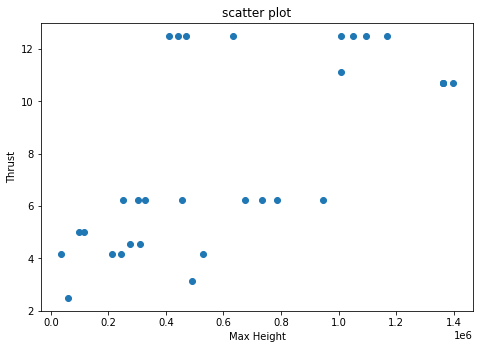

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.scatter(df['Max Height'], df['Thrust'])


ax.set_xlabel('Max Height')
ax.set_ylabel('Thrust')
ax.set_title('scatter plot')
plt.show()

In [13]:
Thrust = df['Thrust']
MaxH = df['Max Height']
InitWeight = df['Initial Weight(kg)']




In [14]:
# calculate covariance matrix
covariance = cov(Thrust, MaxH)
print(covariance)

#calculate pearsonr
corr, _ = pearsonr(Thrust, MaxH)
print('Pearsons correlation: %.3f' % corr)

[[1.26694394e+01 1.02824733e+06]
 [1.02824733e+06 1.86928377e+11]]
Pearsons correlation: 0.668


- The covariance between the two variables is 1.02824733e+06. We can see that it is positive, suggesting the variables change in the same direction as we expect.
- Correlation suggest that it is moderately strong relationship

In [15]:
# calculate covariance matrix
covariance = cov(Thrust, InitWeight)
print(covariance)

#calculate pearsonr
corr, _ = pearsonr(Thrust, InitWeight)
print('Pearsons correlation: %.3f' % corr)

[[1.26694394e+01 4.70402992e-02]
 [4.70402992e-02 2.54756280e-04]]
Pearsons correlation: 0.828


In [16]:
# calculate covariance matrix
covariance = cov(InitWeight, MaxH)
print(covariance)

#calculate pearsonr
corr,_ = pearsonr(InitWeight, MaxH )
print('Pearsons correlation: %.3f' % corr)
correlation = corr

[[2.54756280e-04 6.02218586e+03]
 [6.02218586e+03 1.86928377e+11]]
Pearsons correlation: 0.873


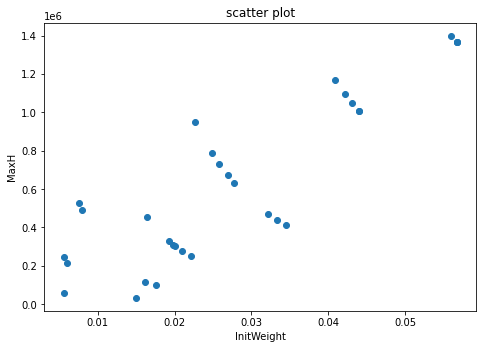

In [17]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.scatter(df['Initial Weight(kg)'], df['Max Height'])



ax.set_xlabel('InitWeight')
ax.set_ylabel('MaxH')
ax.set_title('scatter plot')
plt.show()

In [18]:
# the point at the left bottom corner seems to be a good y-intercept
df[df['Initial Weight(g)']<10]

,Prod,Engine Type,Total Impulse (N/S),Time Delay(Sec.),Max Lift Wt(g),Max Thrust(newtons),Thrust Duration(second),Initial Weight(g),Propellant Weight(g),Thrust,Initial Weight(kg),v,y,x,Max Height
0,1502,1/4A3-3T,0.625,3,28,4.9,0.25,5.6,0.85,2.500000,0.0056,1091.300000,136.412500,60762.025000,60898.437500
1,1503,1/2A3-2T,1.250,2,57,8.3,0.30,5.6,1.75,4.166667,0.0056,2184.560000,327.684000,243484.816000,243812.500000
2,1507,A3-4T,2.500,4,57,6.8,0.60,7.6,3.50,4.166667,0.0076,3217.804211,965.341263,528278.772310,529244.113573
3,1511,A10-3T,2.500,3,85,13.0,0.80,7.9,3.78,3.125000,0.0079,3093.425823,1237.370329,488228.740871,489466.111200
18,1504,1/2A3-4T,1.250,4,28,8.3,0.30,6.0,1.75,4.166667,0.0060,2038.726667,305.809000,212061.552111,212367.361111


Because initial weight and the maximum height has quite a strong correlation, we might be able to predict the maximum height just simply with the initial weight of the rocket engine given
- According to what I learned in AP statistics we can get the slope by Correlation*(Sy/Sx)
- Could have used the linear regression in SkLearn


In [19]:

initialweight = 0.0269


# slope = correlation * (stdev(MaxH)/stdev(InitWeight))= 23639.00852215812

# use min maxheight as y intercept since it was close

function = 243812.500000 + 23639.00852215812 * initialweight

print('The predicted max height of the rocket engine with initial mass, ' + str(initialweight) + ' , is ' + str(function) + '.' )



The predicted max height of the rocket engine with initial mass, 0.0269 , is 244448.38932924604.


In [20]:
df.head(1)

,Prod,Engine Type,Total Impulse (N/S),Time Delay(Sec.),Max Lift Wt(g),Max Thrust(newtons),Thrust Duration(second),Initial Weight(g),Propellant Weight(g),Thrust,Initial Weight(kg),v,y,x,Max Height
0,1502,1/4A3-3T,0.625,3,28,4.9,0.25,5.6,0.85,2.5,0.0056,1091.3,136.4125,60762.025,60898.4375


In [21]:
#Percentage Error

df['Predicted Max Height (Line)'] = df['Initial Weight(kg)']* 1574497.707 + 553005.2946
df['Percent Error (%)'] = (df['Max Height']-df['Predicted Max Height (Line)'])/df['Max Height'] * 100

In [22]:
df

,Prod,Engine Type,Total Impulse (N/S),Time Delay(Sec.),Max Lift Wt(g),Max Thrust(newtons),Thrust Duration(second),Initial Weight(g),Propellant Weight(g),Thrust,Initial Weight(kg),v,y,x,Max Height,Predicted Max Height (Line),Percent Error (%)
0,1502,1/4A3-3T,0.625,3,28,4.9,0.25,5.6,0.85,2.500000,0.0056,1091.300000,136.412500,6.076203e+04,6.089844e+04,561822.481759,-822.556481
1,1503,1/2A3-2T,1.250,2,57,8.3,0.30,5.6,1.75,4.166667,0.0056,2184.560000,327.684000,2.434848e+05,2.438125e+05,561822.481759,-130.432189
2,1507,A3-4T,2.500,4,57,6.8,0.60,7.6,3.50,4.166667,0.0076,3217.804211,965.341263,5.282788e+05,5.292441e+05,564971.477173,-6.750640
3,1511,A10-3T,2.500,3,85,13.0,0.80,7.9,3.78,3.125000,0.0079,3093.425823,1237.370329,4.882287e+05,4.894661e+05,565443.826485,-15.522569
4,1593,1/2A6-2,1.250,2,57,8.9,0.30,15.0,1.56,4.166667,0.0150,813.726667,122.059000,3.378322e+04,3.390528e+04,576622.760205,-1600.687321
5,1598,A8-3,2.500,3,85,10.7,0.50,16.2,3.12,5.000000,0.0162,1507.445679,376.861420,1.159384e+05,1.163153e+05,578512.157453,-397.365687
6,1601,B4-2,5.000,2,113,13.2,1.10,19.8,8.33,4.545455,0.0198,2463.967475,1355.182111,3.097518e+05,3.111070e+05,584180.349199,-87.774734
7,1602,B4-4,5.000,4,99,13.2,1.10,21.0,8.33,4.545455,0.0210,2322.553333,1277.404333,2.752170e+05,2.764944e+05,586069.746447,-111.964384
8,1605,B6-2,5.000,2,127,12.1,0.80,19.3,6.24,6.250000,0.0193,2531.020104,1012.408041,3.268399e+05,3.278523e+05,583393.100345,-77.943855
9,1606,B6-4,5.000,4,113,12.1,0.80,20.1,6.24,6.250000,0.0201,2429.970945,971.988378,3.012632e+05,3.022352e+05,584652.698511,-93.442959


Findings: This linear model is definitely not the way you should predict the maximum height. But it is a way that I learned in stats class and I am glad I get to put in what I learned into the real context. Of course, other than the initial weight there are still many other factors that have to be take into account when calculating the maximum height that a rocket can reach. Could have used the machine learning model to predict the maximum height of the rocket in the future.

The calculation here is just a breif and a really simplified version of calculation, expecting the weight of the engine is initial weight given in the data.

Reference: http://www.rocketmime.com/rockets/rckt_eqn.html#Method